In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import normaltest, kstest, shapiro
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
def brownien(T, n, nb_trajectoires=1, seed=None):
    """
    Simule des trajectoires de mouvement brownien standard.
    """
    if seed is not None:
        np.random.seed(seed)
    
    dt = T / n
    t = np.linspace(0, T, n+1)
    dW = np.sqrt(dt) * np.random.randn(n, nb_trajectoires)
    W = np.zeros((n+1, nb_trajectoires))
    W[1:, :] = np.cumsum(dW, axis=0)
    
    return t, W

In [7]:
def test_normalite_increments(W, t, afficher_plots=True):
    """
    Test 2: Vérifier que les incréments suivent une loi normale
    
    Tests utilisés:
    - Shapiro-Wilk test
    - Kolmogorov-Smirnov test
    """
    n = len(t) - 1
    dt = t[1] - t[0]
    nb_traj = W.shape[1]
    
    # Calculer tous les incréments
    increments = np.diff(W, axis=0).flatten()
    
    # Normaliser par sqrt(dt)
    increments_norm = increments / np.sqrt(dt)
    
    print("=" * 60)
    print("TEST 2 : NORMALITÉ DES INCRÉMENTS")
    print("=" * 60)
    print(f"Nombre d'incréments testés : {len(increments)}")
    print(f"Moyenne empirique : {np.mean(increments_norm):.4f} (attendu: 0)")
    print(f"Variance empirique : {np.var(increments_norm):.4f} (attendu: 1)")
    print()
    
    # Test de Shapiro-Wilk (si nb échantillons < 5000)
    if len(increments_norm) < 5000:
        stat_shapiro, p_shapiro = shapiro(increments_norm)
        print(f"Shapiro-Wilk test:")
        print(f"  Statistique : {stat_shapiro:.4f}")
        print(f"  p-value : {p_shapiro:.4f}")
        print(f"  Résultat : {' PASS' if p_shapiro > 0.05 else '✗ FAIL'} (seuil 5%)")
        print()
    
    # Test de Kolmogorov-Smirnov
    stat_ks, p_ks = kstest(increments_norm, 'norm')
    print(f"Kolmogorov-Smirnov test:")
    print(f"  Statistique : {stat_ks:.4f}")
    print(f"  p-value : {p_ks:.4f}")
    print(f"  Résultat : {'PASS' if p_ks > 0.05 else '✗ FAIL'} (seuil 5%)")
    print()
    
    # Visualisation
    if afficher_plots:
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        # Histogramme
        axes[0].hist(increments_norm, bins=50, density=True, alpha=0.7, 
                     color='skyblue', edgecolor='black', label='Incréments normalisés')
        x = np.linspace(increments_norm.min(), increments_norm.max(), 200)
        axes[0].plot(x, stats.norm.pdf(x), 'r-', linewidth=2, label='N(0,1)')
        axes[0].set_xlabel('Incréments normalisés', fontsize=12)
        axes[0].set_ylabel('Densité', fontsize=12)
        axes[0].set_title('Distribution des Incréments', fontsize=14)
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)
        
        # Q-Q plot
        stats.probplot(increments_norm, dist="norm", plot=axes[1])
        axes[1].set_title('Q-Q Plot', fontsize=14)
        axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

In [9]:
T = 1.0
n = 1000
nb_traj = 5000

t, W = brownien(T, n, nb_trajectoires=nb_traj, seed=42)
print(f"Brownien généré : {W.shape}")

Brownien généré : (1001, 5000)


TEST 2 : NORMALITÉ DES INCRÉMENTS
Nombre d'incréments testés : 5000000
Moyenne empirique : -0.0002 (attendu: 0)
Variance empirique : 1.0002 (attendu: 1)

Kolmogorov-Smirnov test:
  Statistique : 0.0004
  p-value : 0.4960
  Résultat : PASS (seuil 5%)



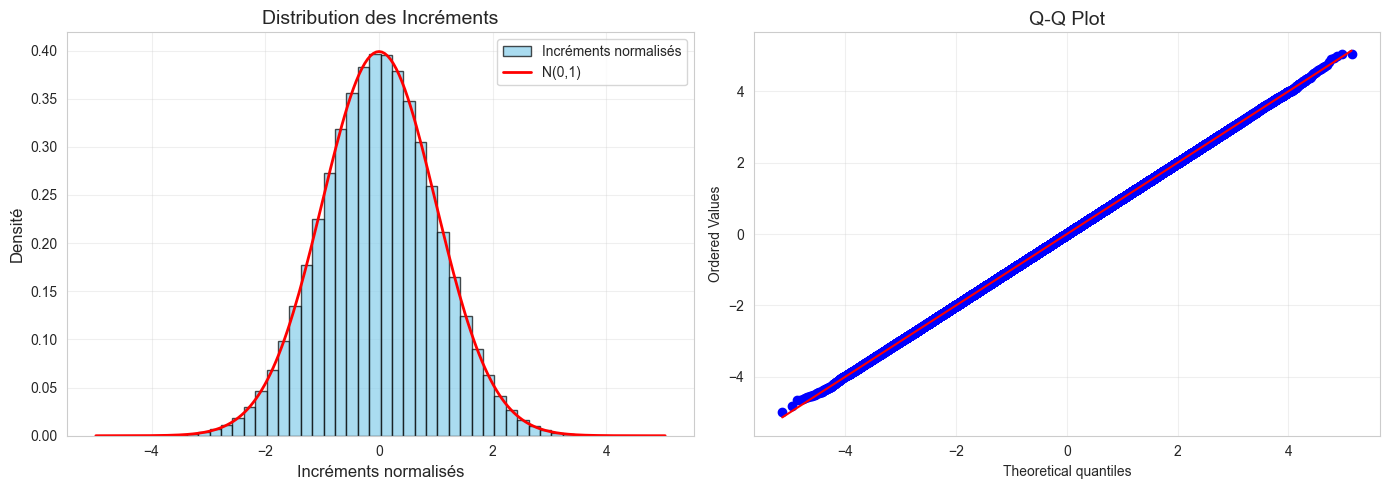

In [10]:
# Cellule : Exécuter le test
test_normalite_increments(W, t, afficher_plots=True)